In [33]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import griddata, interpn
from scipy.stats import binned_statistic
import cmocean.cm as cm
import gsw

plt.rcParams['font.size'] = 12

In [34]:
# files 96 - 100 are the transect from Jan 5
# files 108 and 109 are the two casts at C2
# files 110 - 114 are the transect from Jan 7

# January 5 Microprofiles

In [35]:
mp97 = xr.open_dataset('dat_0097.nc')
mp98 = xr.open_dataset('dat_0098.nc')
mp99 = xr.open_dataset('dat_0099.nc')
mp00 = xr.open_dataset('dat_0100.nc')

# mp97

In [36]:
sh97 = xr.open_dataset('shear0097.nc')
sh98 = xr.open_dataset('shear0098.nc')
sh99 = xr.open_dataset('shear0099.nc')
sh00 = xr.open_dataset('shear0100.nc')

In [37]:
lon97fast = [-72.43545 for i in range(len(mp97.time_fast[0]))] 
lon98fast = [-72.44556 for i in range(len(mp97.time_fast[0]))]
lon99fast = [-72.45535 for i in range(len(mp97.time_fast[0]))]
lon00fast = [-72.46381 for i in range(len(mp97.time_fast[0]))]

lat97fast = [-42.37933 for i in range(len(mp97.time_fast[0]))]
lat98fast = [-42.38055 for i in range(len(mp97.time_fast[0]))]
lat99fast = [-42.38144 for i in range(len(mp97.time_fast[0]))]
lat00fast = [-42.38165 for i in range(len(mp97.time_fast[0]))]

# *transect varies most in the east-west so lets plot according to lon

In [38]:
# must just use downcast
FastStart97 = 10000
FastEnd97 = 225000
FastStart98 = 12000
FastEnd98 = 119000
FastStart99 = 12000
FastEnd99 = 122000
FastStart00 = 11000
FastEnd00 = 77000

In [39]:
lon_fast = np.append(lon97fast[FastStart97:FastEnd97],np.append(lon98fast[FastStart98:FastEnd98],np.append(lon99fast[FastStart99:FastEnd99],lon00fast[FastStart00:FastEnd00])))
lat_fast = np.append(lon97fast[FastStart97:FastEnd97],np.append(lon98fast[FastStart98:FastEnd98],np.append(lon99fast[FastStart99:FastEnd99],lon00fast[FastStart00:FastEnd00])))
pressure_fast = np.append(mp97.P_fast.values[0,FastStart97:FastEnd97],np.append(mp98.P_fast.values[0,FastStart98:FastEnd98],np.append(mp99.P_fast.values[0,FastStart99:FastEnd99],mp00.P_fast.values[0,FastStart00:FastEnd00])))
chloro = np.append(mp97.chlorophyll.values[0,FastStart97:FastEnd97],np.append(mp98.chlorophyll.values[0,FastStart98:FastEnd98],np.append(mp99.chlorophyll.values[0,FastStart99:FastEnd99],mp00.chlorophyll.values[0,FastStart00:FastEnd00])))
turb = np.append(mp97.turbidity.values[0,FastStart97:FastEnd97],np.append(mp98.turbidity.values[0,FastStart98:FastEnd98],np.append(mp99.turbidity.values[0,FastStart99:FastEnd99],mp00.turbidity.values[0,FastStart00:FastEnd00])))
temp = np.append(mp97.T1.values[0,FastStart97:FastEnd97],np.append(mp98.T1.values[0,FastStart98:FastEnd98],np.append(mp99.T1.values[0,FastStart99:FastEnd99],mp00.T1.values[0,FastStart00:FastEnd00])))
cond = np.append(mp97.C1.values[0,FastStart97:FastEnd97],np.append(mp98.C1.values[0,FastStart98:FastEnd98],np.append(mp99.C1.values[0,FastStart99:FastEnd99],mp00.C1.values[0,FastStart00:FastEnd00])))

In [40]:
data = {'lon':lon_fast, 'lat':lat_fast, 'pressure':pressure_fast, 'chloro':chloro, 'turb':turb, 'temp':temp, 'cond':cond}
fast = pd.DataFrame(data)

In [41]:
SP = gsw.conversions.SP_from_C(fast.cond+1.5327121667524777, fast.temp, fast.pressure)
fast['sali'] = gsw.conversions.SA_from_SP(np.array(SP), np.array(fast.pressure), -72.4477, -42.1646)

In [42]:
# bin by depth in 1 m intervals
depth_bins = np.arange(0,np.max(fast.pressure)+1,1)
lons = [lon97fast[0],lon98fast[0],lon99fast[0],lon00fast[0]]
lats = [lat97fast[0],lat98fast[0],lat99fast[0],lat00fast[0]]

chloro_bin =np.array([binned_statistic(fast.pressure[(fast.lon == lon)], fast.chloro[(fast.lon == lon)], statistic='mean', bins=depth_bins)[0][:] for lon in lons]).flatten()
turb_bin =np.array([binned_statistic(fast.pressure[(fast.lon == lon)], fast.turb[(fast.lon == lon)], statistic='mean', bins=depth_bins)[0][:] for lon in lons]).flatten()
temp_bin =np.array([binned_statistic(fast.pressure[(fast.lon == lon)], fast.temp[(fast.lon == lon)], statistic='mean', bins=depth_bins)[0][:] for lon in lons]).flatten()
sali_bin =np.array([binned_statistic(fast.pressure[(fast.lon == lon)], fast.sali[(fast.lon == lon)], statistic='mean', bins=depth_bins)[0][:] for lon in lons]).flatten()

pressure_bin = np.tile(depth_bins[:-1],4)
lat_bin = np.array([np.repeat(lat, len(depth_bins)-1) for lat in lats]).flatten()
lon_bin = np.array([np.repeat(lon, len(depth_bins)-1) for lon in lons]).flatten()

In [43]:
data = {'lon':lon_bin, 'lat':lat_bin, 'pressure':pressure_bin, 'chloro':chloro_bin, 'turb':turb_bin, 'temp':temp_bin, 'sali':sali_bin}
fast_bin = pd.DataFrame(data)
# fast_bin

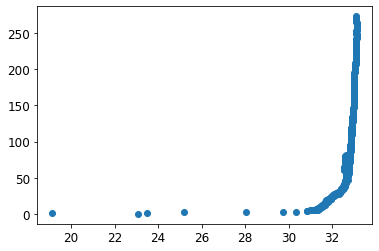

In [44]:
plt.scatter(fast_bin.sali, fast_bin.pressure)
# plt.xlim([-0.2,0.2])

In [65]:
chloro_min = 0
chloro_max = 11

shear_min = -2
shear_max = +2

turb_min = 0
turb_max = 1.2

temp_min = 10.5
temp_max = 18

sali_min = 28
sali_max = 33.5

In [46]:
lon_bins = [lon00fast[0]-0.005,np.mean([lon99fast[0],lon00fast[0]]),np.mean([lon98fast[0],lon99fast[0]]),np.mean([lon97fast[0],lon98fast[0]]),lon97fast[0]+0.005]

lon_label = [str(lon00fast[0])[:-2]+"\nstation 205", str(lon99fast[0])[:-2]+"\nstation 204", str(lon98fast[0])[:-2]+"\nstation 203", str(lon97fast[0])[:-2]+"\nstation 201"]
label_loc = [lon00fast[0]-0.005, lon99fast[0]-0.005, lon98fast[0]-0.005, lon97fast[0]-0.005]

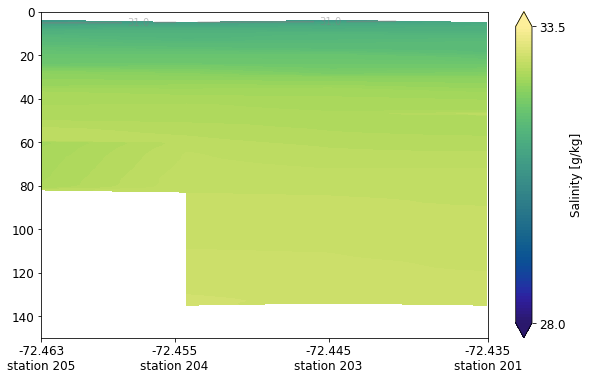

In [66]:
H_sal, xedges, yedges = np.histogram2d(fast_bin.lon, fast_bin.pressure, weights=fast_bin.sali, bins=[lon_bins,depth_bins])
X, Y = np.meshgrid(xedges[:-1], yedges[:-1])

fig, ax = plt.subplots(1,1,figsize=(10,6))
levelsf = np.linspace(sali_min,sali_max, 100)
# levels = np.linspace(sali_min,sali_max, 5)

WMlevels = [11,21,31,33,33.8,34.9]
fmt = fmt = {}
WMlabels = ['Fresh', 'EW', 'EW-Saline', 'MSAAW', 'SAAW', 'ESSW']
for l, s in zip(WMlevels, WMlabels):
    fmt[l] = s


cmap = cm.haline

im = ax.contourf(X, Y, H_sal.T,levelsf, cmap=cmap, extend='both')
cb1 = fig.colorbar(im, ticks=[sali_min,sali_max], ax=ax, label='Salinity [g/kg]')
CS= ax.contour(X, Y, H_sal.T,WMlevels, colors='grey', zorder=2, alpha=0.5)

ax.set_xticks(label_loc)
ax.set_xticklabels(lon_label)
ax.clabel(CS, inline=True,fontsize=10)
ax.set_xlim([-72.46881,-72.44045])
ax.invert_yaxis()
ax.set_ylim([150,0]);

#g/kg

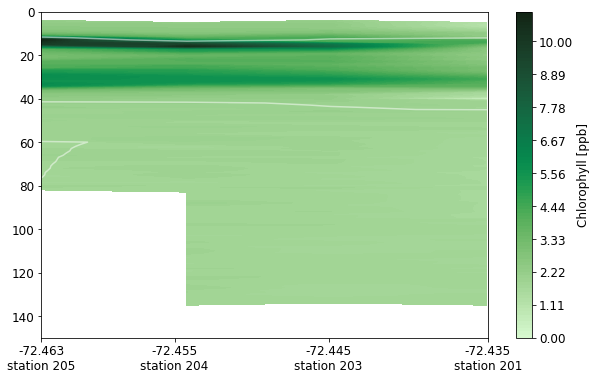

In [48]:
H, xedges, yedges = np.histogram2d(fast_bin.lon, fast_bin.pressure, weights=fast_bin.chloro, bins=[lon_bins,depth_bins])
X, Y = np.meshgrid(xedges[:-1], yedges[:-1])

fig, ax = plt.subplots(1,1,figsize=(10,6))
levelsf = np.linspace(chloro_min,chloro_max, 100)
levels = np.linspace(chloro_min,chloro_max, 5)
im = ax.contourf(X, Y, H.T,levelsf, cmap=cm.algae)
cb1 = fig.colorbar(im, ax=ax, label="Chlorophyll [ppb]")
# ax.contour(X, Y, H.T,levels, colors='grey', zorder=2, alpha=0.5)

sal_levels = [31.6,32.6]
ax.contour(X, Y, H_sal.T,sal_levels, colors='white', zorder=2, alpha=0.5)

ax.set_xticks(label_loc)
ax.set_xticklabels(lon_label)
ax.set_xlim([-72.46881,-72.44045])
ax.invert_yaxis()
ax.set_ylim([150,0]);

# ppb

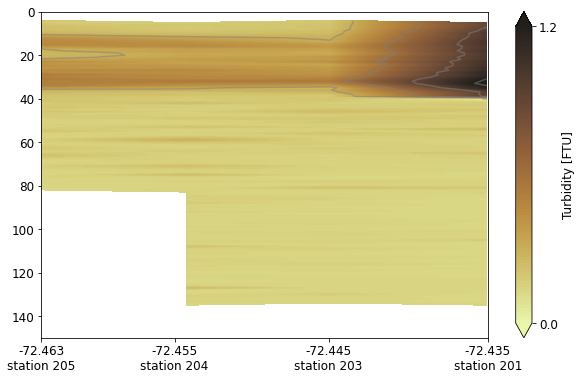

In [49]:
H, xedges, yedges = np.histogram2d(fast_bin.lon, fast_bin.pressure, weights=fast_bin.turb, bins=[lon_bins,depth_bins])
X, Y = np.meshgrid(xedges[:-1], yedges[:-1])

fig, ax = plt.subplots(1,1,figsize=(10,6))
levelsf = np.linspace(turb_min,turb_max, 100)
levels = np.linspace(turb_min,turb_max, 5)

cmap = cm.turbid

im = ax.contourf(X, Y, H.T,levelsf, cmap=cmap, extend='both')
cb1 = fig.colorbar(im, ticks=[turb_min,turb_max], ax=ax, label='Turbidity [FTU]')
ax.contour(X, Y, H.T,levels, colors='grey', zorder=2, alpha=0.5)

ax.set_xticks(label_loc)
ax.set_xticklabels(lon_label)
ax.set_xlim([-72.46881,-72.44045])
ax.invert_yaxis()
ax.set_ylim([150,0]);

# FTU

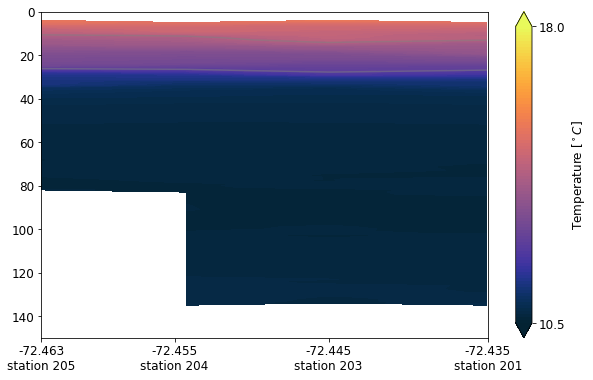

In [50]:
H, xedges, yedges = np.histogram2d(fast_bin.lon, fast_bin.pressure, weights=fast_bin.temp, bins=[lon_bins,depth_bins])
X, Y = np.meshgrid(xedges[:-1], yedges[:-1])

fig, ax = plt.subplots(1,1,figsize=(10,6))
levelsf = np.linspace(temp_min,temp_max, 100)
levels = np.linspace(temp_min,temp_max, 5)

cmap = cm.thermal

im = ax.contourf(X, Y, H.T,levelsf, cmap=cmap, extend='both')
cb1 = fig.colorbar(im, ticks=[temp_min,temp_max], ax=ax, label="Temperature [$^\circ C$]")
ax.contour(X, Y, H.T,levels, colors='grey', zorder=2, alpha=0.5)
# im = ax.scatter(flow.lon, flow.pressure,c=flow.TSG_temp,cmap=cm.thermal, vmin=temp_min, vmax=temp_max)

ax.set_xticks(label_loc)
ax.set_xticklabels(lon_label)
ax.set_xlim([-72.46881,-72.44045])

ax.invert_yaxis()
ax.set_ylim([150,0]);

### similar analysis but with shear

In [51]:
shear1 = abs(np.append(sh97.SH_HP[0],np.append(sh98.SH_HP[0],np.append(sh99.SH_HP[0],sh00.SH_HP[0]))))
shear2 = abs(np.append(sh97.SH_HP[1],np.append(sh98.SH_HP[1],np.append(sh99.SH_HP[1],sh00.SH_HP[1]))))
Pshear = np.append(sh97.Indep_var_fast,np.append(sh98.Indep_var_fast,np.append(sh99.Indep_var_fast,sh00.Indep_var_fast)))

In [52]:
lat_shear = np.append(np.repeat(lats[0],len(sh97.SH_HP[0])),np.append(np.repeat(lats[1],len(sh98.SH_HP[0])),np.append(np.repeat(lats[2],len(sh99.SH_HP[0])),np.repeat(lats[3],len(sh00.SH_HP[0])))))
lon_shear = np.append(np.repeat(lons[0],len(sh97.SH_HP[0])),np.append(np.repeat(lons[1],len(sh98.SH_HP[0])),np.append(np.repeat(lons[2],len(sh99.SH_HP[0])),np.repeat(lons[3],len(sh00.SH_HP[0])))))

In [53]:
data = {'lon':lon_shear, 'lat':lat_shear, 'pressure':Pshear, 'shear1':shear1, 'shear2':shear2}
dtShear = pd.DataFrame(data)

In [54]:
# bin by depth in 1 m intervals
depth_bins = np.arange(0,np.max(dtShear.pressure)+1,1)

shear1_bin =np.array([binned_statistic(dtShear.pressure[(dtShear.lon == lon)], dtShear.shear1[(dtShear.lon == lon)], statistic='mean', bins=depth_bins)[0][:] for lon in lons]).flatten()
shear2_bin =np.array([binned_statistic(dtShear.pressure[(dtShear.lon == lon)], dtShear.shear2[(dtShear.lon == lon)], statistic='mean', bins=depth_bins)[0][:] for lon in lons]).flatten()

pressure_bin = np.tile(depth_bins[:-1],4)
lat_bin = np.array([np.repeat(lat, len(depth_bins)-1) for lat in lats]).flatten()
lon_bin = np.array([np.repeat(lon, len(depth_bins)-1) for lon in lons]).flatten()

In [55]:
data = {'lon':lon_bin, 'lat':lat_bin, 'pressure':pressure_bin, 'shear1':shear1_bin, 'shear2':shear2_bin}
shear_bin = pd.DataFrame(data)

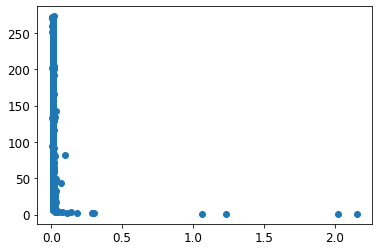

In [56]:
plt.scatter(shear1_bin, pressure_bin)

In [57]:
shear_min = 0
shear_max = 1

In [58]:
# H, xedges, yedges = np.histogram2d(shear_bin.lon, shear_bin.pressure, weights=shear_bin.shear1, bins=[lon_bins,depth_bins])
# X, Y = np.meshgrid(xedges[:-1], yedges[:-1])

# fig, ax = plt.subplots(1,1,figsize=(10,6))
# levelsf = np.linspace(shear_min,shear_max, 100)
# levels = np.linspace(shear_min,shear_max, 5)

# cmap = cm.balance

# im = ax.contourf(X, Y, H.T,levelsf, cmap=cmap, extend='both')
# cb1 = fig.colorbar(im, ticks=[shear_min,0,shear_max], ax=ax)
# # ax.contour(X, Y, H.T,levels, colors='grey', zorder=2, alpha=0.5)
# ax.set_xticks(label_loc)
# ax.set_xticklabels(lon_label)
# ax.invert_yaxis()

In [59]:
lon_label

['-72.463\nstation 205',
 '-72.455\nstation 204',
 '-72.445\nstation 203',
 '-72.435\nstation 201']

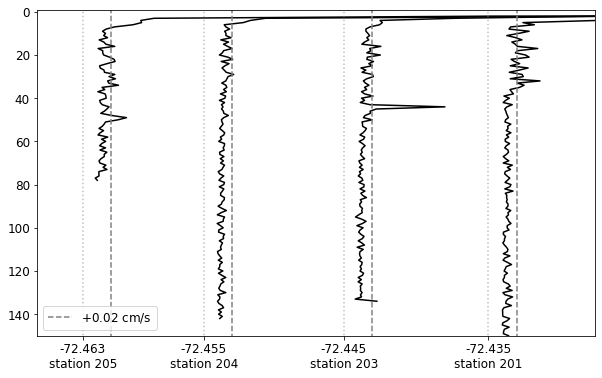

In [60]:
# prefer to see in spaced out line plot instead!

fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(shear_bin.shear1[shear_bin.lon==lons[0]]+lons[0]*10, shear_bin.pressure[shear_bin.lon==lons[0]], 'k')
ax.plot(shear_bin.shear1[shear_bin.lon==lons[1]]+lons[1]*10, shear_bin.pressure[shear_bin.lon==lons[1]], 'k')
ax.plot(shear_bin.shear1[shear_bin.lon==lons[2]][:-131]+lons[2]*10, shear_bin.pressure[shear_bin.lon==lons[2]][:-131], 'k')
ax.plot(shear_bin.shear1[shear_bin.lon==lons[3]][:-195]+lons[3]*10, shear_bin.pressure[shear_bin.lon==lons[3]][:-195], 'k')
ax.plot([lons[0]*10,lons[0]*10],[276,-1],'grey', ls=':', alpha=0.5)
ax.plot([lons[1]*10,lons[1]*10],[276,-1],'grey', ls=':', alpha=0.5)
ax.plot([lons[2]*10,lons[2]*10],[276,-1],'grey', ls=':', alpha=0.5)
ax.plot([lons[3]*10,lons[3]*10],[276,-1],'grey', ls=':', alpha=0.5)
ax.plot([lons[0]*10+0.02, lons[0]*10+0.02],[276,-1],'grey',ls='--',label='$+ 0.02$ cm/s')
ax.plot([lons[1]*10+0.02, lons[1]*10+0.02],[276,-1],'grey',ls='--')
ax.plot([lons[2]*10+0.02, lons[2]*10+0.02],[276,-1],'grey',ls='--')
ax.plot([lons[3]*10+0.02, lons[3]*10+0.02],[276,-1],'grey',ls='--')

ax.legend(loc="lower left")
ax.set_xlim([-724.67,-724.28])
ax.set_ylim([150,-1])
ax.set_xticks([lons[i]*10 for i in [3,2,1,0]])
ax.set_xticklabels(lon_label);

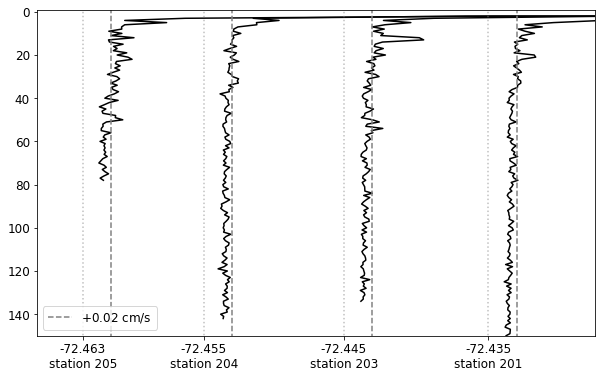

In [61]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(shear_bin.shear2[shear_bin.lon==lons[0]]+lons[0]*10, shear_bin.pressure[shear_bin.lon==lons[0]], 'k')
ax.plot(shear_bin.shear2[shear_bin.lon==lons[1]]+lons[1]*10, shear_bin.pressure[shear_bin.lon==lons[1]], 'k')
ax.plot(shear_bin.shear2[shear_bin.lon==lons[2]][:-131]+lons[2]*10, shear_bin.pressure[shear_bin.lon==lons[2]][:-131], 'k')
ax.plot(shear_bin.shear2[shear_bin.lon==lons[3]][:-195]+lons[3]*10, shear_bin.pressure[shear_bin.lon==lons[3]][:-195], 'k')
ax.plot([lons[0]*10,lons[0]*10],[276,-1],'grey', ls=':', alpha=0.5)
ax.plot([lons[1]*10,lons[1]*10],[276,-1],'grey', ls=':', alpha=0.5)
ax.plot([lons[2]*10,lons[2]*10],[276,-1],'grey', ls=':', alpha=0.5)
ax.plot([lons[3]*10,lons[3]*10],[276,-1],'grey', ls=':', alpha=0.5)
ax.plot([lons[0]*10+0.02, lons[0]*10+0.02],[276,-1],'grey',ls='--',label='$+ 0.02$ cm/s')
ax.plot([lons[1]*10+0.02, lons[1]*10+0.02],[276,-1],'grey',ls='--')
ax.plot([lons[2]*10+0.02, lons[2]*10+0.02],[276,-1],'grey',ls='--')
ax.plot([lons[3]*10+0.02, lons[3]*10+0.02],[276,-1],'grey',ls='--')

ax.legend(loc="lower left")
ax.set_xlim([-724.67,-724.28])
ax.set_ylim([150,-1])
ax.set_xticks([lons[i]*10 for i in [3,2,1,0]])
ax.set_xticklabels(lon_label);

# and Dissipation!

In [62]:
diss = abs(np.append(mp97.diss_e[:,0],np.append(mp98.diss_e[:,0],np.append(mp99.diss_e[:,0],mp00.diss_e[:,0]))))
Pdiss = np.append(mp97.P_diss,np.append(mp98.P_diss,np.append(mp99.P_diss,mp00.P_diss)))
lat_diss = np.append(np.repeat(lats[0],len(mp97.P_diss[0])),np.append(np.repeat(lats[1],len(mp98.P_diss[0])),np.append(np.repeat(lats[2],len(mp99.P_diss[0])),np.repeat(lats[3],len(mp00.P_diss[0])))))
lon_diss = np.append(np.repeat(lons[0],len(mp97.P_diss[0])),np.append(np.repeat(lons[1],len(mp98.P_diss[0])),np.append(np.repeat(lons[2],len(mp99.P_diss[0])),np.repeat(lons[3],len(mp00.P_diss[0])))))

In [63]:
data = {'lon':lon_diss, 'lat':lat_diss, 'pressure':Pdiss, 'diss':diss}
dtDiss = pd.DataFrame(data)
# dont need to bin, already done 

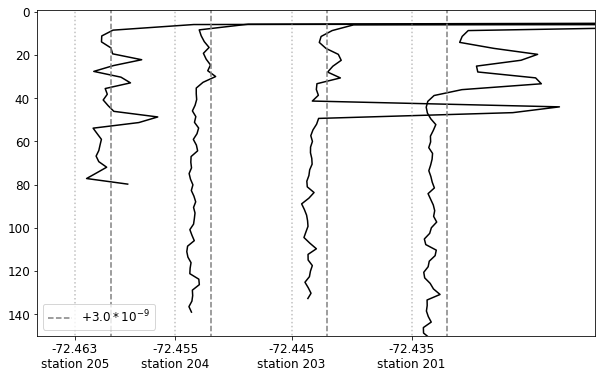

In [64]:
# prefer to see in spaced out line plot instead!

fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(dtDiss.diss[dtDiss.lon==lons[0]]+lons[0]*10**-6, dtDiss.pressure[dtDiss.lon==lons[0]], 'k')
ax.plot(dtDiss.diss[dtDiss.lon==lons[1]]+lons[1]*10**-6, dtDiss.pressure[dtDiss.lon==lons[1]], 'k')
ax.plot(dtDiss.diss[dtDiss.lon==lons[2]]+lons[2]*10**-6, dtDiss.pressure[dtDiss.lon==lons[2]], 'k')
ax.plot(dtDiss.diss[dtDiss.lon==lons[3]]+lons[3]*10**-6, dtDiss.pressure[dtDiss.lon==lons[3]], 'k')
ax.plot([lons[0]*10**-6,lons[0]*10**-6],[276,-1],'grey', ls=':', alpha=0.5)
ax.plot([lons[1]*10**-6,lons[1]*10**-6],[276,-1],'grey', ls=':', alpha=0.5)
ax.plot([lons[2]*10**-6,lons[2]*10**-6],[276,-1],'grey', ls=':', alpha=0.5)
ax.plot([lons[3]*10**-6,lons[3]*10**-6],[276,-1],'grey', ls=':', alpha=0.5)
ax.plot([lons[0]*10**-6+(3e-09), lons[0]*10**-6+(3e-09)],[276,-1],'grey',ls='--',label='$+ 3.0*10^{-9}$')
ax.plot([lons[1]*10**-6+(3e-09), lons[1]*10**-6+(3e-09)],[276,-1],'grey',ls='--')
ax.plot([lons[2]*10**-6+(3e-09), lons[2]*10**-6+(3e-09)],[276,-1],'grey',ls='--')
ax.plot([lons[3]*10**-6+(3e-09), lons[3]*10**-6+(3e-09)],[276,-1],'grey',ls='--')

ax.legend(loc="lower left")
ax.set_xlim([-0.000072467,-0.00007242])
ax.set_ylim([150,-1])
ax.set_xticks([lons[i]*10**-6 for i in [3,2,1,0]])
ax.set_xticklabels(lon_label);